# 01：Critical porosity model and Gassmann Fluid substitution

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams['font.size']=14
plt.rcParams['font.family']='arial'

<div class="alert alert-block alert-success">
<b>Learning Objectives:</b>
<ul>
    <li>Nur's cirtical porosity model</li>
    <li>Gassmann's relations (GS)</li>
    <li>Assumptions and lmitations of GS</li>
</ul>
</div>

## Critical porosity model

Remember Nur’s hypothesis: There is a critical (structure-dependent)
porosity at which the framework stiffness goes to zero! The simple yet powerful critical porosity model is defined as: 

$
K_{\text {dry }}=K_{0}\left(1-\frac{\phi}{\phi_{\mathrm{c}}}\right)
$

$
\mu_{\text {dry }}=\mu_{0}\left(1-\frac{\phi}{\phi_{\mathrm{c}}}\right)
$

where K0 and μ0 are the mineral bulk and shear moduli.

In [2]:
def cripor(K0, G0, phi, phic):
    """Critical porosity model according to Nur’s hypothesis. Written by Jiaxin Yu (July 2021)
    
    Args:
        K0 (GPa): mineral bulk modulus 
        G0 (Gpa): mineral shear modulus 
        phi (frac): porosity
        phic (frac): critical porosity
    Returns:
        K_dry,G_dry: dry elastic moduli of the framework
    """    
    K_dry = K0 * (1-phi/phic)
    G_dry = G0 * (1-phi/phic)

    return K_dry, G_dry

We will compare the Critical porosity model with other commonly used bounds in the next notebook.

## Gassmann Fluid substitution
Compute dry frame moduli using rock physics models such as critical porosity model is straightforward as shown above. It becomes chalenging when it comes to saturated elastic moduli. The solution is Gassmann' explicit equations for fluid substition. In the lecture we learn that Gassmann's relations not only allows us to perform fluid substition (when one fluid is replaced
with another), but to predict saturated-rock moduli from dry-rock moduli, and vice versa. Here we show how to compute saturated moduli via GS. 

The equation we are gonna use is 

$
K_{\text {sat }}=K_{\text {dry }}+\frac{\left(1-K_{\text {dry }} / K_{0}\right)^{2}}{\phi / K_{\mathrm{fl}}+(1-\phi) / K_{0}-K_{\text {dry }} / K_{0}^{2}}
$

This is one of the equivelent expressions of the well known GS-Biot theory for fluid substitution:

$
\frac{K_{\text {sat }}}{K_{0}-K_{\text {sat }}}=\frac{K_{\text {dry }}}{K_{0}-K_{\text {dry }}}+\frac{K_{\text {fl }}}{\phi\left(K_{0}-K_{\text {fl }}\right)}, \quad \mu_{\text {sat }}=\mu_{\text {dry }}$

The derivation is simple, you can try it yourself!

In [3]:
def Gassmann(K_dry,G_dry,K_mat,Kf,phi):
    """Computes velocities and elastic moduli of saturated rock via Gassmann equation given dry-rock moduli. Written by Jiaxin Yu (July 2021)

    Args:
        K_dry (Gpa): dry frame bulk modulus 
        G_dry (Gpa): dry frame shear modulus 
        K_mat (Gpa): matrix bulk modulus
        Kf (Gpa): fluid bulk modulus
        phi (frac): porosity

    Returns:
        K_sat, G_sat: fluid saturated elastic moduli
    """    
    A=(1-K_dry/K_mat)**2
    B=phi/Kf+(1-phi)/K_mat-K_dry/(K_mat**2)
    K_sat=K_dry+A/B
    G_sat = G_dry # At low frequencies, Gassmann’s relations predict no change in the shear modulus between dry and saturated patches
    return K_sat,G_sat

## Examples
* Now Let's firstly estimate the effective dry-rock and water saturated moduli using critical porosity model. Assume that the rock is Arenite with 40% critical porosity.

In [4]:
# specify model parameters
phic=0.4
phi=np.linspace(0.001,phic,100,endpoint=True) # solid volume fraction = 1-phi
K0, G0= 37,44
Kw = 2.2
Kg = 0.5

# Compute dry-rock moduli
K_dry, G_dry= cripor(K0, G0, phi, phic)
# saturate rock with water 
Ksat, Gsat = Gassmann(K_dry,G_dry,K0,Kw,phi)

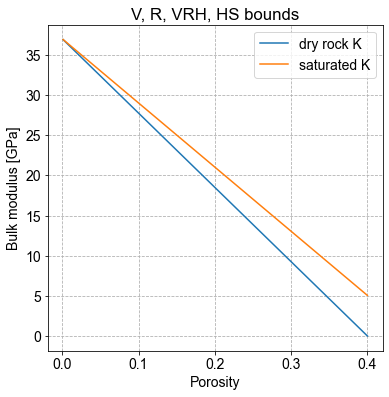

In [5]:
# plot
plt.figure(figsize=(6,6))
plt.xlabel('Porosity')
plt.ylabel('Bulk modulus [GPa]')
plt.title('V, R, VRH, HS bounds')
plt.plot(phi, K_dry,label='dry rock K')
plt.plot(phi, Ksat,label='saturated K')

plt.legend(loc='best')
plt.grid(ls='--')

We can see from the figure that effective bulk modulus increases when the rock is saturated.

<div class="alert alert-block alert-warning">
<b>Assumptions of GS</b>
<ul>
    <li>Low frequencies, seisic frequencies are accepted, sonic-logging frequencies may not fall in the valid range, but GS is usually applied on well log data with considerations on rock type and fluid viscosity. Lab frequencies are not suitable for performing GS</li>
    <li>Isotropic, Linear elasticity</li>
    <li>connectivity of pore space</li>
    <li>100% fluid substitution</li>
</ul>
</div>
<br>
<div class="alert alert-block alert-warning">
<b>Extensions of GS</b>
<ul>
    <li>GS assumes single mineralogy making up the rock. But this isn't the case in reality, rocks are hetergeneous. we can approach the mixed mineralogy by computing an average matrix moduli using e.g. Voigt-Reuss-Hill average. </li>
    <li>When it comes to partial saturation, Reuss average can be used to compute an overall fluid bulk modulus.</li>
    <li>For clay-rich rock, when the clay is load-bearing, it goes into the calculation of avearge matrix moduli as mentioned above, when clay is pore-filling, it is modeled as a fluid phase.</li>
</ul>
</div>

<div class="alert alert-block alert-info">
<b>Reference:</b> Mavko, G., Mukerji, T. and Dvorkin, J., 2020. The rock physics handbook. Cambridge university press.
</div>